In [5]:
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input , Dense , Flatten
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.layers.convolutional import Conv2D

Giriş katmanları,

In [6]:
visible = Input(shape= (64 , 64 ,1))

Öznitelik çıkarma işlemler için evrişim katmanları

In [7]:
# 1. Evrişim katmanı
conv1 = Conv2D(32 , kernel_size = 4 , activation= "relu")(visible)
pool1 = MaxPooling2D(pool_size= (2,2 ))(conv1)
flat1 = Flatten()(pool1)

# 2. Evrişim katmanı
conv2 = Conv2D(16 , kernel_size = 8 , activation= "relu")(visible)
pool2 = MaxPooling2D(pool_size= (2,2 ))(conv2)
flat2 = Flatten()(pool2)

# Birleştirme katmanı 

merge = concatenate([flat1 , flat2])

hidden1 = Dense(10 , activation=  "relu" )(merge)

# Çıktı katmanı
output = Dense(1 , activation= "sigmoid" )(hidden1)

model = Model(inputs = visible , outputs =  output ) 

# Modeli özetle

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 61, 61, 32)   544         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 57, 57, 16)   1040        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 30, 30, 32)   0           conv2d[0][0]                     
______________________________________________________________________________________________

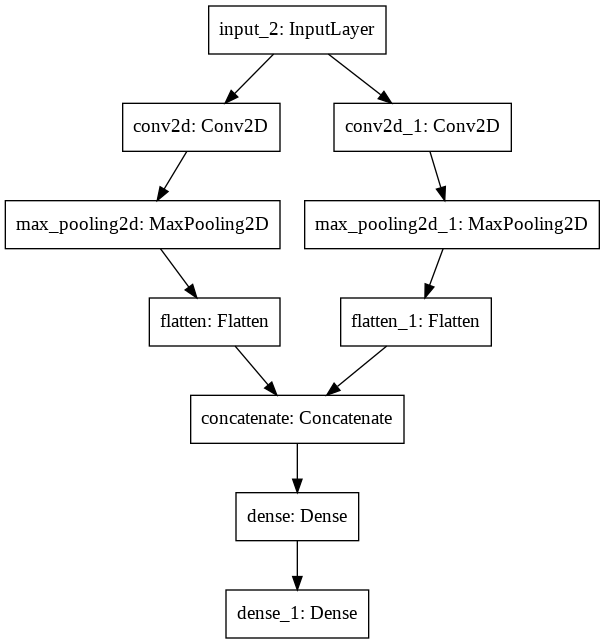

In [8]:
plot_model(model , to_file= "model.png")